<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 1: Regresión Logística 

> La **regresión logística** es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama **regresión logística simple** cuando solo hay una variable independiente y **regresión logística múltiple*** cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como **regresores, predictores o features**.

Si una variable cualitativa con dos niveles (binaría) se codifica como 0 y 1, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados. Sin embargo, esta aproximación tiene dos problemas:

- Al generar una recta (hiperplano si hay múltiples variables), se pueden obtener valores predichos distintos de 0 y 1, lo que entra en contradicción con la definición de la variable respuesta binaria.

- Si se quiere interpretar las predicciones del modelo como probabilidades de pertenencia a cada clase, no se cumpliría la condición de que toda probabilidad ha de estar dentro del intervalo [0,1], ya que podrían obtenerse valores fuera de este.

Para evitar estos problemas, la **regresión logística** transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1 (función sigmoide). 

> Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide):

$$sigmoide = \sigma(y) = \frac{1}{1+e^{-y}}$$

<img style="float: center;;" src='Figures/sigmoide.png' width="500" height="100"/></a>

### Ejemplos:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X, Y = make_blobs(n_samples=300, centers=[[0,0], [3,3]], cluster_std=0.5, n_features=2)


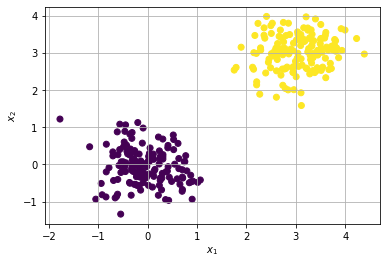

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

## Clase para la Regresion Logística

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogistictRegression():
    
    def __init__(self, lr= 0.0001, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.mse_hist = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.mse_hist=[]
        
        for _ in range(self.n_iters):
            ypred = np.dot(X, self.weights) + self.bias  #Prediccion del modelo lineal
            predictions = sigmoid(ypred)            #prediccion logistica (0,1)
            
            #El gradiente descendente
            dw = (1/n_samples)*np.dot(X.T, (predictions - y))
            db = (1/n_samples)*np.sum(predictions - y)
            
            self.weights = self.weights - self.lr*dw   # beta_{k+1} = beta_k - dJ(beta)
            self.bias = self.bias - self.lr*db
            self.mse_hist.append(self.mse(X,y))
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def predict(self, X):
        ypred = np.dot(X, self.weights) + self.bias  #Prediccion del modelo lineal
        predictions = self.sigmoid(ypred) 
        class_pred = np.array([0 if y<=0.5 else 1 for y in predictions])
        return class_pred
    
    def mse(self,X,y):
        return np.mean((y - self.predict(X))**2)
    
    def get_coef(self):
        return self.weights
    
    def get_bias(self):
        return self.bias
    
    def get_mse_hist(self):
        return self.mse_hist
            

In [6]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(Y)

In [7]:
X_df.shape, y_df.shape

((300, 2), (300, 1))

In [8]:
from HAIA import HyAIA as hy

In [9]:
import random
random.seed(0)
X_train_df, X_test_df, y_train_df, y_test_df = hy.train_test_split(X_df, y_df, 0.1)

In [10]:
X_train_df.shape, y_train_df.shape

((270, 2), (270, 1))

In [11]:
log_reg_model = LogistictRegression(lr=0.01,n_iters = 10000)
#Entrenando al modelo
log_reg_model.fit(X_train_df.values, y_train_df.values.flatten())


In [12]:
#Predicciones del modelo
y_pred_train = log_reg_model.predict(X_train_df)
y_pred_test = log_reg_model.predict(X_test_df)

In [13]:
y_pred_test

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1])

In [14]:
y_test_df.values.flatten()

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1])

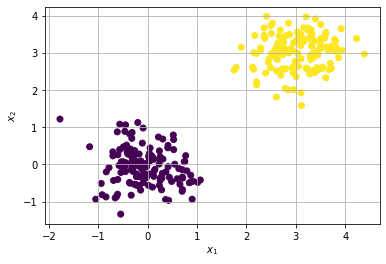

In [15]:
plt.figure(figsize=(6,4))
#plt.scatter(X_test_df.values[:,0], X_test_df.values[:,1], c=y_pred_test)
plt.scatter(X_train_df.values[:,0], X_train_df.values[:,1], c=y_pred_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

In [17]:
#log_reg_model.get_mse_hist()

Text(0, 0.5, 'MSE')

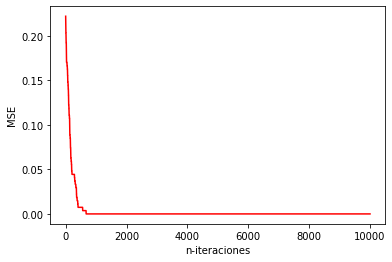

In [18]:
plt.figure(figsize=(6,4))
plt.plot(log_reg_model.get_mse_hist(), 'r')
plt.xlabel('n-iteraciones')
plt.ylabel('MSE')

In [19]:
def accuray(y_pred, y):
    return np.sum(y_pred==y)/len(y)


In [22]:
y_pred_test

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1])

In [23]:
y_test_df.values.flatten()

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1])

In [21]:
accuray(y_pred_test, y_test_df.values.flatten())

1.0

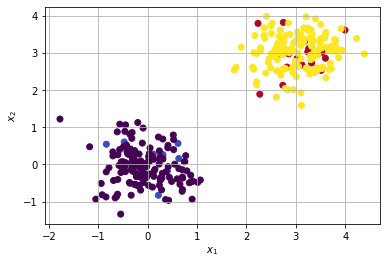

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(X_test_df.values[:,0], X_test_df.values[:,1], c=y_pred_test, cmap='coolwarm')
plt.scatter(X_train_df.values[:,0], X_train_df.values[:,1], c=y_pred_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

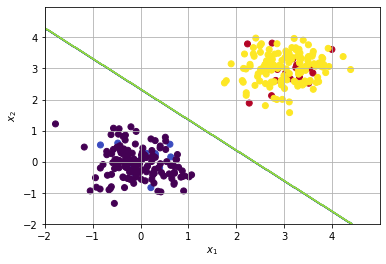

In [28]:
#Dibujar la frontera de separación el modelo lineal
x = np.arange(-2,5,0.01)
y = np.arange(-2,5,0.01)

Xm, Ym = np.meshgrid(x,y)
m,n = Xm.shape
Xmr = np.reshape(Xm, (m*n,1))
Ymr = np.reshape(Ym, (m*n,1))
Xtmp = np.append(Xmr,Ymr, axis=1)
Ytmp= np.round(log_reg_model.predict(Xtmp),0)
Z = np.reshape(Ytmp, (m,n))

plt.figure(figsize=(6,4))
plt.contour(Xm,Ym,Z) #Frontera de separación
plt.scatter(X_test_df.values[:,0], X_test_df.values[:,1], c=y_pred_test, cmap='coolwarm')
plt.scatter(X_train_df.values[:,0], X_train_df.values[:,1], c=y_pred_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()


## Ejemplo 2: Realizar el ejemplo anterior utilizando las librerías de sklearn

In [30]:
from sklearn import linear_model
from sklearn.metrics import (accuracy_score, precision_score, recall_score)


In [33]:
y_train_df.values.shape

(270, 1)

In [37]:
modelo = linear_model.LogisticRegression()
#Entrenar al modelo
modelo.fit(X_train_df.values, y_train_df.values.flatten())

LogisticRegression()

In [38]:
Yhat_train = modelo.predict(X_train_df.values)

In [39]:
Yhat_test = modelo.predict(X_test_df.values)

In [40]:
accuracy_score(Yhat_train, y_train_df.values.flatten())

1.0

In [41]:
accuracy_score(Yhat_test, y_test_df.values.flatten())

1.0

## Ejemplo 3:  RgresiónLogística (datos que no son linealmente separables)

In [43]:
dataset = pd.read_csv('Data/ex2data2.txt', header=None)
dataset.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [44]:
X_df = dataset.iloc[:,:2]
y_df = dataset.iloc[:,2]

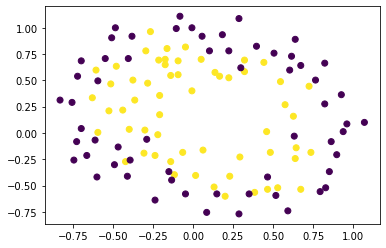

In [45]:
plt.figure(figsize=(6,4))
plt.scatter(X_df.values[:,0], X_df.values[:,1], c=y_df.values )

In [46]:
import random
random.seed(0)
X_train_df, X_test_df, y_train_df, y_test_df = hy.train_test_split(X_df, y_df, 0.1)


In [47]:
X_train_df.shape, y_train_df.shape

((106, 2), (106,))

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
#Preparar los datos para la transformación del polinomio
ngrado = 3
poly = PolynomialFeatures(ngrado, include_bias=False)
Xp_train_df = pd.DataFrame(poly.fit_transform(X_train_df))
Xp_test_df = pd.DataFrame(poly.fit_transform(X_test_df))

In [59]:
X_train_df.head()

,0,1
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [60]:
Xp_train_df.head()

,0,1,2,3,4,5,6,7,8
0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354
1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335
2,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733
3,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650
4,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960


In [62]:
#Crear el modelo de reg logística 
reg_modelp = LogistictRegression(lr=0.01)
#Entrenar al modelo
reg_modelp.fit(Xp_train_df.values, y_train_df.values.flatten())


In [63]:
#Predecir los datos de Xtrain y Xtest
y_pred_train = reg_modelp.predict(Xp_train_df.values)
y_pred_test = reg_modelp.predict(Xp_test_df.values)

In [64]:
y_pred_train


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [65]:
y_pred_test

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0])

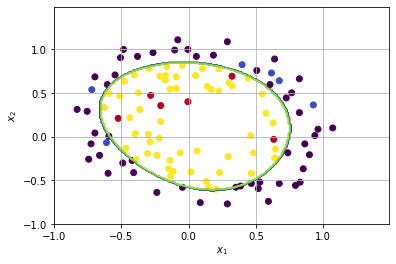

======== Métricas del Entrenamiento ==========
Accuracy :  0.7924528301886793
Precision:  0.7818181818181819
Recall   :  0.8113207547169812
======== Métricas del Testeo ==========
Accuracy :  0.9166666666666666
Precision:  0.8333333333333334
Recall   :  1.0


In [69]:
#Dibujar la frontera de separación el modelo lineal
x = np.arange(-1,1.5,0.01)
y = np.arange(-1,1.5,0.01)

Xm, Ym = np.meshgrid(x,y)
m,n = Xm.shape
Xmr = np.reshape(Xm, (m*n,1))
Ymr = np.reshape(Ym, (m*n,1))
Xtmp = np.append(Xmr,Ymr, axis=1)
Xtmp_poly = poly.fit_transform(Xtmp)
Ytmp= np.round(reg_modelp.predict(Xtmp_poly),0)
Z = np.reshape(Ytmp, (m,n))

plt.figure(figsize=(6,4))
plt.contour(Xm,Ym,Z) #Frontera de separación
plt.scatter(X_test_df.values[:,0], X_test_df.values[:,1], c=y_pred_test, cmap='coolwarm')
plt.scatter(X_train_df.values[:,0], X_train_df.values[:,1], c=y_pred_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

print('======== Métricas del Entrenamiento ==========')
print('Accuracy : ', accuracy_score(y_train_df.values.flatten(), y_pred_train))
print('Precision: ', precision_score(y_train_df.values.flatten(), y_pred_train))
print('Recall   : ', recall_score(y_train_df.values.flatten(), y_pred_train))

print('======== Métricas del Testeo ==========')
print('Accuracy : ', accuracy_score(y_test_df.values.flatten(), y_pred_test))
print('Precision: ', precision_score(y_test_df.values.flatten(), y_pred_test))
print('Recall   : ', recall_score(y_test_df.values.flatten(), y_pred_test))


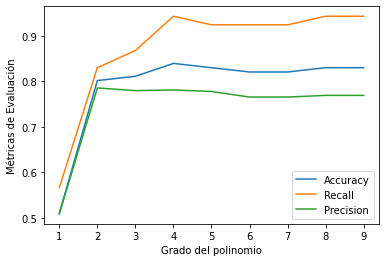

In [72]:
modelo = linear_model.LogisticRegression()
grados = np.arange(1,10)

Accu = []
Prec = []
Recall = []

for grado in grados:
    poly = PolynomialFeatures(grado)
    Xp_train_df = poly.fit_transform(X_train_df)
    #Entrenar al modelo
    modelo.fit(Xp_train_df, y_train_df)
    #predicción
    y_pred_train = modelo.predict(Xp_train_df)
    
    Accu.append(accuracy_score(y_train_df.values.flatten(), y_pred_train))
    Prec.append(precision_score(y_train_df.values.flatten(), y_pred_train))
    Recall.append(recall_score(y_train_df.values.flatten(), y_pred_train))

plt.figure(figsize=(6,4))
plt.plot(grados, Accu)
plt.plot(grados, Recall)
plt.plot(grados, Prec)
plt.legend(('Accuracy', 'Recall', 'Precision'), loc='best')
plt.xlabel('Grado del polinomio')
plt.ylabel('Métricas de Evaluación')
plt.show()
    
    

## Actividad: Social_Network_Adds

1.- Estandarizar los datos (StandardScaler) x_std = (x - x.mean())/x.std()

2.- Utilizando la libreria hecha en clase, encontrar un modelo de reg. logística 

3.- El modelo encontrado tenga un accuracy mayor al 80% 

4.- Predecir datos nuevos (clientes nuevos) C_new =[35, 58000]


In [73]:
datasets = pd.read_csv('Data/Social_Network_Ads.csv')

In [74]:
datasets.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
